# Atari RGMs

This notebooks shows how to fit RGMs on Atari expert play.

To get the expert data, download .zip files from: https://drive.google.com/drive/folders/1JzF74ll6vpKgDs5jajcq3Xd2TQ2Kl-hE

Drop the files into `../data/atari/<game>` and/or adjust the data_dir below.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rgm import *

In [3]:
data_dir = "/home/tverbele/Data/atari"

game = "pong"
action_range = [3, 17]

warmup = 0
structure_learn = 1024
B_learn = 0

In [4]:
import numpy as np
import jax

expert_imgs = np.load(data_dir + "/" + game + "/frames.npz")["arr_0"][0, :, 0, :, :, :] # 64x64
expert_actions = np.load(data_dir + "/" + game + "/actions.npz")["arr_0"][0]

# uncomment if you want higher resolution
# expert_imgs = np.load(data_dir + "/" + game + "/raw_frames.npz")["arr_0"][0]
# expert_imgs = jax.image.resize( expert_imgs / 255.0, shape=(expert_imgs.shape[0],128, 128, 3), method="cubic")

(1024, 64, 64, 3)
(1024, 1)


expert

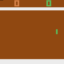

In [5]:
import mediapy
import jax.numpy as jnp

observations = expert_imgs[warmup:warmup+structure_learn]
actions = expert_actions[warmup : warmup + structure_learn]
print(observations.shape)
print(actions.shape)

with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"expert": [i for i in observations]}, width=160, height=160, fps=20, codec="gif")

In [6]:
from rgm.fast_structure_learning import *

In [32]:
n = 8
max_n_modes = 20
n_bins = 37

In [33]:
one_hots, V, projection_bins = map_rgb_patched_2_discrete(
    observations, max_n_modes=max_n_modes, n_bins=n_bins, patch_width=n, patch_height=n
)

In [34]:
one_hots.shape

(1280, 1024, 37)

In [35]:
rec = map_discrete_2_rgb_patched(one_hots, V, projection_bins, patch_width=n, patch_height=n, image_shape=(64, 64))

gt,reconstructed

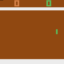
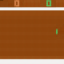

In [36]:
import mediapy

with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"gt": observations, "reconstructed": rec}, width=160, height=160, fps=5, codec="gif")

In [37]:
agents, RG, LB = spm_mb_structure_learning(one_hots, None, (64 // n, 64 // n, max_n_modes))

structure learn level 0 group 0 time 4.619537115097046
structure learn level 0 group 1 time 1.5931673049926758
structure learn level 0 group 2 time 1.400557518005371
structure learn level 0 group 3 time 1.7223186492919922
structure learn level 0 group 4 time 2.124108076095581
structure learn level 0 group 5 time 2.901393413543701
structure learn level 0 group 6 time 1.9448387622833252
structure learn level 0 group 7 time 2.6490256786346436
structure learn level 0 group 8 time 2.3990836143493652
structure learn level 0 group 9 time 2.1548476219177246
structure learn level 0 group 10 time 2.086982250213623
structure learn level 0 group 11 time 2.121105909347534
structure learn level 0 group 12 time 1.7633640766143799
structure learn level 0 group 13 time 0.8527166843414307
structure learn level 0 group 14 time 1.913456916809082
structure learn level 0 group 15 time 2.001011610031128
structure learn level 1 group 0 time 2.0172834396362305
structure learn level 1 group 1 time 1.64951729774

In [40]:
agents[-1].B[0].shape

(1, 255, 255, 2)

In [41]:
one_hot = jnp.zeros([1, agents[-1].B[0].shape[1]])
one_hot = one_hot.at[0, 10].set(1.0)
qs = [one_hot]

In [42]:
one_hots_pred, _ = predict(agents, qs, jnp.array([[0]]), num_steps=20)

In [43]:
pred = map_discrete_2_rgb_patched(
    one_hots_pred[0], V, projection_bins, patch_width=n, patch_height=n, image_shape=(64, 64)
)

pred

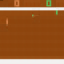

In [44]:
import mediapy

with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"pred": pred}, width=320, height=320, fps=20, codec="gif")

In [45]:
for a in agents:
    print("A")
    for A in a.A:
        print(A.shape)
    print("B")
    for B in a.B:
        print(B.shape)

A
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 49)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 22)
(1, 37, 17)
(1, 37, 17)
(1, 37, 17)
(1

In [49]:
def random_colormap(K, seed=0):
    """
    Generates a random colormap for K channels.

    Parameters:
    K (int): Number of unique colors required.
    seed (int): Seed for reproducibility of random colors.

    Returns:
    jax.numpy.ndarray: Colormap of shape (K, 3) with random RGB values in [0, 1].
    """
    # Initialize random key
    key = jax.random.PRNGKey(seed)

    # Generate K random colors, each with 3 values (R, G, B)
    colormap = jax.random.uniform(key, (K, 3), minval=0.0, maxval=1.0)

    return colormap


def tensor_to_rgb(tensor, colormap):
    """
    Converts a T x N x N x K tensor with binary values to a T x N x N x 3 RGB tensor for visualization.

    Parameters:
    tensor (jax.numpy.ndarray): Input tensor of shape (T, N, N, K) with values 0 or 1.
    seed (int): Seed for generating the random colormap.

    Returns:
    jax.numpy.ndarray: Tensor of shape (T, N, N, 3) with RGB values for visualization.
    """
    T, N, _, K = tensor.shape

    # Multiply each binary channel by its color and sum across channels
    rgb_tensor = jnp.einsum("tijk,kc->tijc", tensor, colormap) / max_n_modes

    # Clip values to stay within valid RGB range [0, 1]
    rgb_tensor = jnp.clip(rgb_tensor, 0, 1)

    return rgb_tensor

In [50]:
test = one_hots.reshape(-1, max_n_modes, one_hots.shape[-2], n_bins)
test = test.transpose(2, 0, 1, 3).reshape(test.shape[-2], 8, 8, -1)
reduced = tensor_to_rgb(test, random_colormap(test.shape[-1]))

reduced

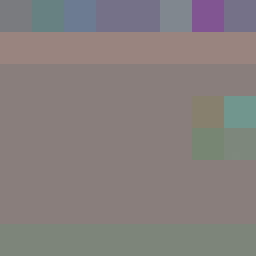

In [51]:
import numpy as np
from PIL import Image

resize = lambda x: jnp.array(Image.fromarray(np.array((x * 255).astype(jnp.uint8))).resize((256, 256), Image.NEAREST))

with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"reduced": [resize(r) for r in reduced]}, width=320, height=320, fps=20, codec="gif")

In [52]:
one_hots.shape

(1280, 1024, 37)

In [53]:
one_hots_per_patch = one_hots.reshape(-1, max_n_modes, one_hots.shape[-2], n_bins).transpose(2, 0, 1, 3)

In [54]:
# time x n_patches x n_modes x n_bins
one_hots_per_patch.shape

(1024, 64, 20, 37)

In [55]:
agg = one_hots_per_patch.reshape(one_hots_per_patch.shape[0] * one_hots_per_patch.shape[1], -1)

In [56]:
m, n, j = jnp.unique(agg, return_index=True, return_inverse=True, axis=0)

In [57]:
agg.shape

(65536, 740)

In [58]:
m.shape

(899, 740)

In [59]:
A_flat = agg[n]
A = jnp.split(A_flat.T, max_n_modes, axis=0)

In [60]:
A[0].shape

(37, 899)

In [61]:
j.shape

(65536,)

In [62]:
transitions = j.reshape(one_hots_per_patch.shape[0], one_hots_per_patch.shape[1]).transpose()

In [63]:
transitions.shape

(64, 1024)

In [65]:
transitions[0, :200]

Array([412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 41

In [66]:
actions.squeeze(-1)[:200]

array([1, 4, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 4, 1, 1, 3, 5, 3, 3, 5, 2, 3,
       3, 1, 0, 0, 2, 1, 1, 1, 1, 1, 3, 3, 2, 2, 4, 2, 1, 2, 4, 1, 2, 0,
       1, 3, 3, 3, 3, 3, 5, 3, 5, 5, 3, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 5,
       1, 5, 5, 3, 2, 2, 4, 2, 2, 2, 0, 1, 5, 1, 0, 1, 5, 5, 5, 1, 1, 2,
       1, 5, 0, 2, 0, 0, 0, 1, 1, 5, 0, 3, 2, 2, 2, 4, 0, 3, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 3, 5, 4, 1, 0, 1, 1, 0, 4, 4, 5, 5,
       5, 0, 0, 1, 4, 2, 2, 2, 2, 5, 5, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       3, 5, 5, 5, 5, 3, 5, 3, 5, 5, 5, 3, 3, 3, 3, 5, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 3, 5, 4, 2, 5, 5, 2, 4, 4, 1, 1,
       1, 1])

In [67]:
from tqdm import tqdm
from pymdp.maths import multidimensional_outer, dirichlet_expected_value

n_actions = jnp.max(actions) + 1
pB = jnp.ones((A[0].shape[1], A[0].shape[1], n_actions)) * 1e-6

a = nn.one_hot(actions.squeeze(-1), n_actions, axis=-1)
qs = nn.one_hot(transitions, pB.shape[0], axis=-1)
print(qs.shape)
print(a.shape)

def dirichlet_count(qs):
    return vmap(multidimensional_outer)([qs[:-1], qs[1:], a[:-1]]).sum(axis=0)

lr = 1

# when dims get too big, this vmap fails?
# dfdb = vmap(dirichlet_count)(qs).sum(axis=0)
# pB = pB + lr * dfdb

for p in tqdm(range(qs.shape[0])):
    dfdb = dirichlet_count(qs[p])
    pB = pB + lr * dfdb

B = [dirichlet_expected_value(pB)]

(64, 1024, 899)
(1024, 6)


100%|██████████| 64/64 [05:00<00:00,  4.70s/it]


In [69]:
jnp.argmax(B[0][:, 412, 0])

Array(412, dtype=int32)

In [70]:
qs.shape

(64, 1024, 899)

In [71]:
from pymdp.agent import Agent

batch_size = 64

As = jtu.tree_map(lambda x: jnp.repeat(jnp.expand_dims(x, axis=0), batch_size, axis=0), A)
Bs = jtu.tree_map(lambda x: jnp.repeat(jnp.expand_dims(x, axis=0), batch_size, axis=0), B)

low_agent = Agent(
    A=As, B=Bs, apply_batch=False, onehot_obs=True, policies=jnp.empty([0])
)

In [73]:
qs = jtu.tree_map(lambda x: jnp.expand_dims(x, 1), low_agent.D)

In [74]:
qs[0].shape

(64, 1, 899)

In [75]:
from pymdp.control import compute_expected_obs

expected_obs = partial(compute_expected_obs, A_dependencies=low_agent.A_dependencies)

qs_t = jtu.tree_map(lambda x: x[:, -1, ...], qs)
qo = jnp.expand_dims(jnp.asarray(jax.vmap(expected_obs)(qs_t, low_agent.A)).transpose(1, 0, 2).reshape(-1, n_bins), 1)

In [76]:
qo.shape

(1280, 1, 37)

In [77]:
rec = map_discrete_2_rgb_patched(qo, V, projection_bins, patch_width=8, patch_height=8, image_shape=(64, 64))

imagined

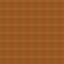

In [78]:
import mediapy

with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"imagined": rec}, width=320, height=320, fps=20, codec="gif")

In [79]:
o_t = one_hots[:, 50:51, :]

In [80]:
o_t.shape

(1280, 1, 37)

In [81]:
o_t = o_t.reshape(-1, max_n_modes, o_t.shape[-2], n_bins).transpose(1,0, 2, 3)

In [82]:
o_t.shape

(20, 64, 1, 37)

In [83]:
o_t = jnp.split(o_t, o_t.shape[0], axis=0)

In [84]:
o_t = jtu.tree_map(lambda x: x.squeeze(0), o_t)

In [85]:
posterior = low_agent.infer_states(o_t, low_agent.D)

In [86]:
posterior[0].shape

(64, 1, 899)

In [87]:
qs_t = jtu.tree_map(lambda x: x[:, -1, ...], posterior)
qo = jnp.expand_dims(jnp.asarray(jax.vmap(expected_obs)(qs_t, low_agent.A)).transpose(1, 0, 2).reshape(-1, n_bins), 1)
rec = map_discrete_2_rgb_patched(qo, V, projection_bins, patch_width=8, patch_height=8, image_shape=(64, 64))

imagined

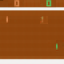

In [88]:
with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"imagined": rec}, width=320, height=320, fps=20, codec="gif")

In [92]:
expected_state = partial(compute_expected_state, B_dependencies=low_agent.B_dependencies)

num_steps = 3
E = jnp.array([[0]])
E = jnp.repeat(E, batch_size, axis=0)

qs = posterior
for _ in range(num_steps):
    # extract the last timestep, such tthat qs_last[f] has shape (batch_dim, num_states)
    qs_last = jtu.tree_map(lambda x: x[:, -1, ...], qs)
    # this computation of the predictive prior is correct only for fully factorised Bs.
    pred = vmap(expected_state)(qs_last, low_agent.B, E)

    # stack in time dimension
    qs = jtu.tree_map(
        lambda x, y: jnp.concatenate([x, jnp.expand_dims(y, 1)], 1),
        qs,
        pred,
    )

In [93]:
recs = []
for t in range(4):
    qs_t = jtu.tree_map(lambda x: x[:, t, ...], qs)
    qo = jnp.expand_dims(jnp.asarray(jax.vmap(expected_obs)(qs_t, low_agent.A)).transpose(1, 0, 2).reshape(-1, n_bins), 1)
    rec = map_discrete_2_rgb_patched(qo, V, projection_bins, patch_width=8, patch_height=8, image_shape=(64, 64))
    recs.append(rec)
recs = jnp.concatenate(recs)

noop

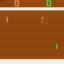

In [94]:
with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"noop": recs}, width=320, height=320, fps=2, codec="gif")

down

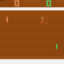

In [183]:
E = jnp.array([[2]])
E = jnp.repeat(E, batch_size, axis=0)

qs = posterior
for _ in range(num_steps):
    # extract the last timestep, such tthat qs_last[f] has shape (batch_dim, num_states)
    qs_last = jtu.tree_map(lambda x: x[:, -1, ...], qs)
    # this computation of the predictive prior is correct only for fully factorised Bs.
    pred = vmap(expected_state)(qs_last, low_agent.B, E)

    # stack in time dimension
    qs = jtu.tree_map(
        lambda x, y: jnp.concatenate([x, jnp.expand_dims(y, 1)], 1),
        qs,
        pred,
    )

recs = []
for t in range(4):
    qs_t = jtu.tree_map(lambda x: x[:, t, ...], qs)
    qo = jnp.expand_dims(
        jnp.asarray(jax.vmap(expected_obs)(qs_t, low_agent.A)).transpose(1, 0, 2).reshape(-1, n_bins), 1
    )
    rec = map_discrete_2_rgb_patched(qo, V, projection_bins, patch_width=8, patch_height=8, image_shape=(64, 64))
    recs.append(rec)
recs = jnp.concatenate(recs)


with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"down": recs}, width=320, height=320, fps=2, codec="gif")

up

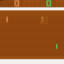

In [182]:
E = jnp.array([[3]])
E = jnp.repeat(E, batch_size, axis=0)

qs = posterior
for _ in range(num_steps):
    # extract the last timestep, such tthat qs_last[f] has shape (batch_dim, num_states)
    qs_last = jtu.tree_map(lambda x: x[:, -1, ...], qs)
    # this computation of the predictive prior is correct only for fully factorised Bs.
    pred = vmap(expected_state)(qs_last, low_agent.B, E)

    # stack in time dimension
    qs = jtu.tree_map(
        lambda x, y: jnp.concatenate([x, jnp.expand_dims(y, 1)], 1),
        qs,
        pred,
    )

recs = []
for t in range(4):
    qs_t = jtu.tree_map(lambda x: x[:, t, ...], qs)
    qo = jnp.expand_dims(
        jnp.asarray(jax.vmap(expected_obs)(qs_t, low_agent.A)).transpose(1, 0, 2).reshape(-1, n_bins), 1
    )
    rec = map_discrete_2_rgb_patched(qo, V, projection_bins, patch_width=8, patch_height=8, image_shape=(64, 64))
    recs.append(rec)
recs = jnp.concatenate(recs)


with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"up": recs}, width=320, height=320, fps=2, codec="gif")

In [100]:
one_hots.shape

(1280, 1024, 37)

In [102]:
rgm_qs = infer(agents, one_hots[:, 50:54, :], None)

In [105]:
jnp.argmax(rgm_qs[0][0])

Array(85, dtype=int32)

In [116]:
preferences, _ = predict(agents, rgm_qs, None, num_steps=0)
preferences = preferences[0]

pref

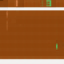

In [117]:
recs = []
for t in range(4):
    rec = map_discrete_2_rgb_patched(preferences[:, t:t+1, :], V, projection_bins, patch_width=8, patch_height=8, image_shape=(64, 64))
    recs.append(rec)
recs = jnp.concatenate(recs)

with mediapy.set_show_save_dir("/tmp"):
    mediapy.show_videos({"pref": recs}, width=320, height=320, fps=2, codec="gif")

In [154]:
def to_o_list(o):
    o_t = o.reshape(-1, max_n_modes, o.shape[-2], n_bins).transpose(1, 0, 2, 3)
    o_t = jnp.split(o_t, o_t.shape[0], axis=0)
    o_t = jtu.tree_map(lambda x: x.squeeze(0), o_t)
    return o_t

In [135]:
def infer_low_level(o):
    # one hots of shape [ n_modalities x time (=1) x n_bins ]
    o_t = o.reshape(-1, max_n_modes, o.shape[-2], n_bins).transpose(1, 0, 2, 3)
    o_t = jnp.split(o_t, o_t.shape[0], axis=0)
    o_t = jtu.tree_map(lambda x: x.squeeze(0), o_t)
    return low_agent.infer_states(o_t, low_agent.D)

In [136]:
low_qs = infer_low_level(one_hots[:, 50:51, :])

In [134]:
low_qs[0].shape 

(64, 1, 899)

In [141]:
from pymdp import control

policies = control.construct_policies(
    [low_agent.B[0].shape[0]],
    [n_actions],
    1,
    [0],
)

In [143]:
policies.shape

(6, 1, 1)

In [145]:
policies = jnp.repeat(policies, 64, axis=1)

In [151]:
len(low_agent.C)

20

In [152]:
low_agent.C[0].shape

(64, 37)

In [153]:
preferences.shape

(1280, 4, 37)

In [155]:
c = to_o_list(preferences)

In [156]:
len(c)

20

In [157]:
c[0].shape

(64, 4, 37)

In [164]:
prefs = jtu.tree_map(lambda x: x[:, 1, :], c)
qs_last = jtu.tree_map(lambda x: x[:, -1, ...], low_qs)

def eval_policy(policy):
    qs_next = vmap(expected_state)(qs_last, low_agent.B, policy)
    qo = jax.vmap(expected_obs)(qs_next, low_agent.A)

    utility = jax.vmap(control.compute_expected_utility)(qo, prefs)
    return utility

u = jax.vmap(eval_policy)(policies)

In [165]:
u.shape

(6, 64)

In [166]:
u

Array([[19.813633 ,  5.0201106,  2.2726026, 19.999966 , 19.999966 ,
         4.2516522,  8.254034 , 19.999964 ,  3.4385242, 18.539204 ,
        17.495863 , 19.824995 , 19.573713 , 19.826752 , 19.697609 ,
        19.542334 ,  2.4899478, 13.175536 , 19.752497 , 19.788002 ,
        19.818266 ,  5.248311 , 19.718075 , 19.433748 , 15.47051  ,
        19.19516  , 16.570501 , 19.818266 , 19.818266 , 19.818266 ,
        19.488247 , 19.13079  , 19.818268 , 19.818268 , 19.818268 ,
        19.818268 , 19.818264 , 19.818264 , 19.465399 , 18.606924 ,
        19.818268 , 19.818268 , 19.818268 , 19.818268 , 19.818264 ,
        19.818264 , 13.172592 ,  2.8169806, 19.818268 , 19.818268 ,
        19.818268 , 19.818268 , 19.818264 , 19.818264 , 10.960392 ,
         3.3896294, 19.84495  , 19.84495  , 19.84495  , 19.84495  ,
        19.844946 , 19.844946 , 18.921282 , 15.241194 ],
       [19.813667 ,  5.0201826,  2.2726142, 19.999977 , 19.999977 ,
         4.2516966,  8.286969 , 19.999973 ,  3.4242666, 18.

In [167]:
G = jnp.sum(u, axis=-1)

In [168]:
G

Array([1084.6582, 1089.0725, 1108.811 , 1082.8611, 1108.4343, 1083.4193],      dtype=float32)

In [180]:
actions[50:54]

array([[5],
       [3],
       [5],
       [5]])

In [173]:
nn.softmax(G*10)

Array([0.        , 0.        , 0.9773924 , 0.        , 0.02260761,
       0.        ], dtype=float32)

In [175]:
diff = u - u[0, :]

In [179]:
jnp.argmax(jnp.sum(jnp.abs(diff), axis=0))

Array(47, dtype=int32)